# Pr7-3: 線形フィルタ

ここでは，OpenCVのcv2.filter2D関数を主に使い，様々なフィルタ効果を確認していきます．

## 線形フィルタの計算式

$\sum \sum h(m, n) f(i+m, j+n) = g(i,j)$

## 入力画像の準備

フィルタ処理では，負の値も扱うため，


```py
I = np.float32(I) / 255.0
```

により，[0, 1]の範囲のfloatデータに置き換えて計算しています．
Matplotlibはfloat型の[0, 1]範囲のカラー画像をそのまま


```py
plt.imshow(I)
```
で表示できます．




- image size: (256, 554)


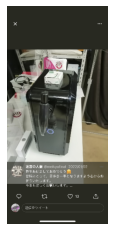

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm

image_file = "basaki.PNG"
I_bgr = cv2.imread(image_file)
I = cv2.cvtColor(I_bgr, cv2.COLOR_BGR2RGB)

# float型に変換
I = np.float32(I) / 255.0

# 可視化用の縮小処理
scale = 256 / I.shape[1] 
I = cv2.resize(I, None, fx = scale, fy = scale)
I_gray = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

plt.imshow(I)
plt.axis('off')

print("- image size: ({0}, {1})".format(I.shape[1], I.shape[0]))

## 表示用の補助コード

画像I, F1, F2を3枚並べてlabel1, label2のタイトルをつけて表示します． 

In [3]:
def comp_results(I, F1, F2, label1, label2):
  fig = plt.figure(figsize=(16,8))
  plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.05, wspace=0.05)

  plt.subplot(1, 3, 1)
  plt.imshow(I)
  plt.title('Original')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(np.clip(F1, 0, 1))
  plt.title(label1)
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(np.clip(F2, 0, 1))
  plt.title(label2)
  plt.axis('off')

## フィルタのひな形コード

hにフィルタカーネルを指定し，以下のコードでフィルタ結果を得ることができます．

```
F = cv2.filter2D(I, ddepth, h)
```

ddepthは出力の型で，-1を指定するとIと同じ型でFが出力されます．



## 平均化フィルタ

フィルタのカーネルは行列なので，
以下のように直接値を指定できます．

```
h_m_3x3 = np.array([[1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9]])
```

5x5の入力は少し面倒ですが，np.onesを使うことで入力を簡略化できます．

- np.onesを使うことで全てが1のフィルターカーネルを作ることができます．
- 足したら1になるように要素数で割ります．（5x5=25で割ります）


1/9 = 0.1111111111111111
h_m_3x3=
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

1/25 = 0.04
h_m_5x5=
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]



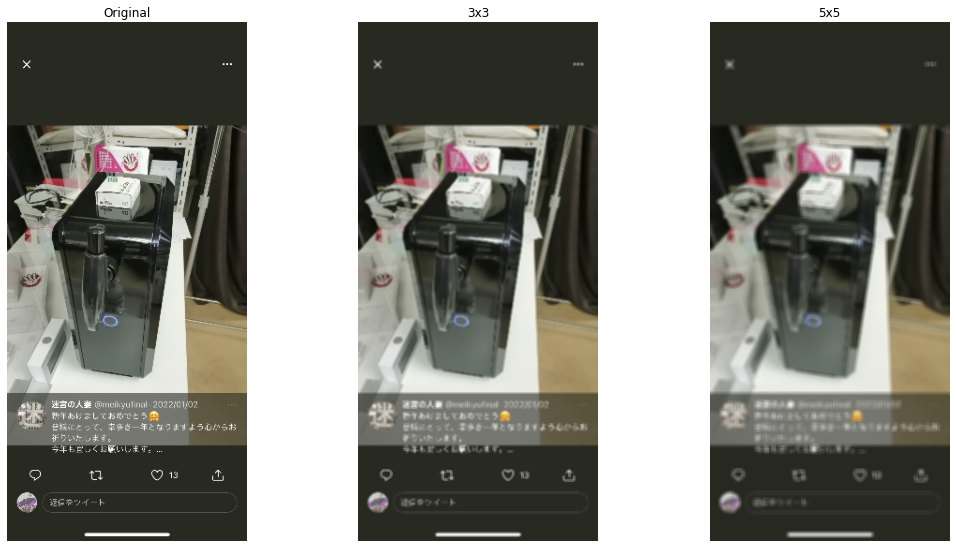

In [4]:
# 3x3サイズのフィルターカーネルの値を設定
# - 配列要素での設定
h_m_3x3 = np.array([[1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9]])

# 5x5サイズのフィルターカーネルの値を設定
# - np.ones関数での指定
h_m_5x5 = np.ones((5,5)) / 25.0

# 全要素が1/9
print("1/9 = {0}".format(1.0/9.0))
print("h_m_3x3=\n{0}\n".format(h_m_3x3))

# 全要素が1/25
print("1/25 = {0}".format(1.0/25.0))
print("h_m_5x5=\n{0}\n".format(h_m_5x5))

# フィルタの実行
ddepth = -1
I_m_3x3 = cv2.filter2D(I, ddepth, h_m_3x3)
I_m_5x5 = cv2.filter2D(I, ddepth, h_m_5x5)

# 結果の表示
comp_results(I, I_m_3x3, I_m_5x5, "3x3", "5x5")

## 加重平均フィルタ

加重平均フィルタのカーネルを設定してみましょう．

$h_{3\times3} = \left[\begin{matrix}\frac{1}{16}  & \frac{2}{16} & \frac{1}{16} \\\frac{2}{16} & \frac{4}{16} & \frac{2}{16}\\\frac{1}{16}  & \frac{2}{16} & \frac{1}{16} \end{matrix}\right]$

$h_{5\times5} = \left[\begin{matrix}\frac{1}{256} & \frac{4}{256} & \frac{6}{256}  & \frac{4}{256}  & \frac{1}{256}\\\frac{4}{256}  & \frac{16}{256}  & \frac{24}{256}  & \frac{16}{256}  & \frac{4}{256} \\\frac{6}{256}  & \frac{24}{256}  & \frac{36}{256}  & \frac{24}{256}  & \frac{6}{256} \\\frac{4}{256}  & \frac{16}{256}  & \frac{24}{256}  & \frac{16}{256}  & \frac{4}{256} \\\frac{1}{256} & \frac{4}{256}  & \frac{6}{256}  & \frac{4}{256}  & \frac{1}{256}\end{matrix}\right]
$

加重平均フィルタのカーネルは全部足すと1になります．
出力が1.0になっているのを確認しましょう．


```
sum(h_wm_3x3):  1.0
sum(h_wm_5x5):  1.0
```



sum(h_wm_3x3):  1.0
sum(h_wm_5x5):  1.0


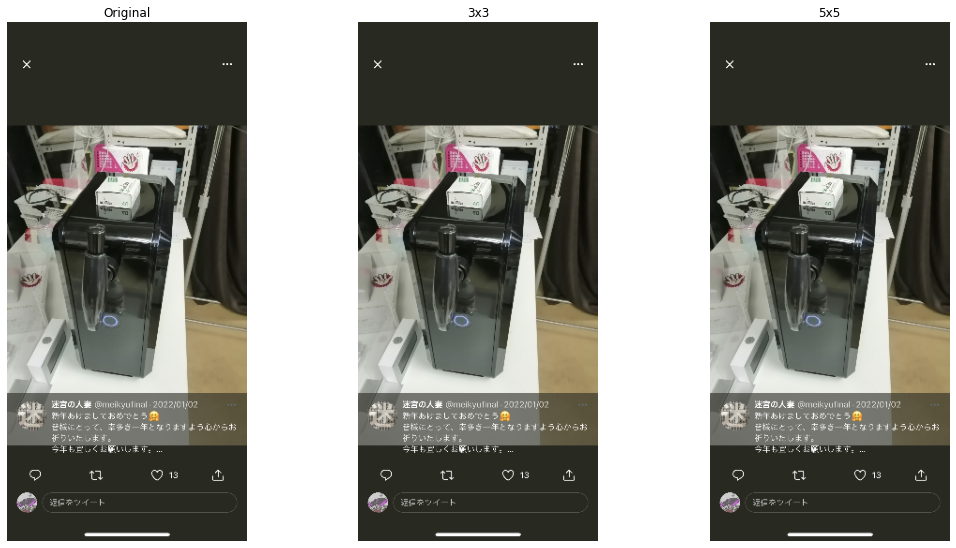

In [5]:
# Work: 3x3サイズのフィルターカーネルの値を設定
h_wm_3x3 = np.ones((1,1))

# Work: 5x5サイズのフィルターカーネルの値を設定
h_wm_5x5 = np.ones((1,1))

# 足したら1になるかどうかのチェック
print("sum(h_wm_3x3): ", np.sum(h_wm_3x3))
print("sum(h_wm_5x5): ", np.sum(h_wm_5x5))

# フィルタの実行
ddepth = -1
I_wm_3x3 = cv2.filter2D(I, ddepth, h_wm_3x3)
I_wm_5x5 = cv2.filter2D(I, ddepth, h_wm_5x5)

# 結果の表示
comp_results(I, I_wm_3x3, I_wm_5x5, "3x3", "5x5")

## エッジ抽出: 1次微分フィルタ

1次微分フィルタのカーネルを設定してみましょう．

$h_x = \left[\begin{matrix}0 & 0 & 0\\0 & -1 & 1\\0 & 0 & 0\end{matrix}\right]$

$h_y = \left[\begin{matrix}0 & 0 & 0\\0 & -1 & 0\\0 & 1 & 0\end{matrix}\right]$

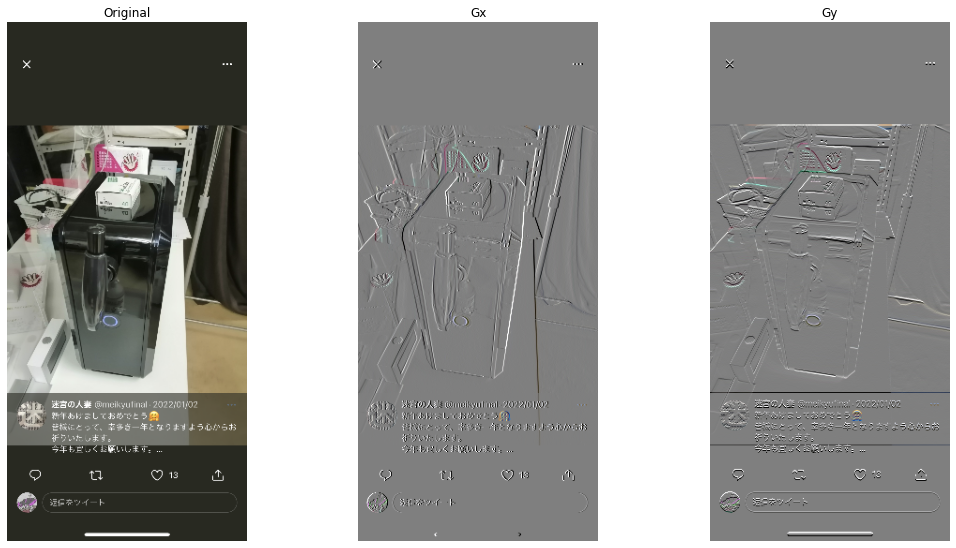

In [7]:
# Work: x方向のフィルターカーネルの値を設定
h_x = np.array([[0,0,0],[0,-1,1],[0,0,0]])

# Work: y方向のフィルターカーネルの値を設定
h_y = np.transpose(h_x)

# フィルタの実行
ddepth = -1
Gx = cv2.filter2D(I, ddepth, h_x)
Gy = cv2.filter2D(I, ddepth, h_y)

# 結果の表示
comp_results(I, Gx+0.5, Gy+0.5, "Gx", "Gy")

## エッジ抽出: 2次微分フィルタ

ラプラシアンフィルタの結果を出してみましょう．

$h_L = \left[\begin{matrix}0 & 1 & 0\\1 & -4 & 1\\0 & 1 & 0\end{matrix}\right]$



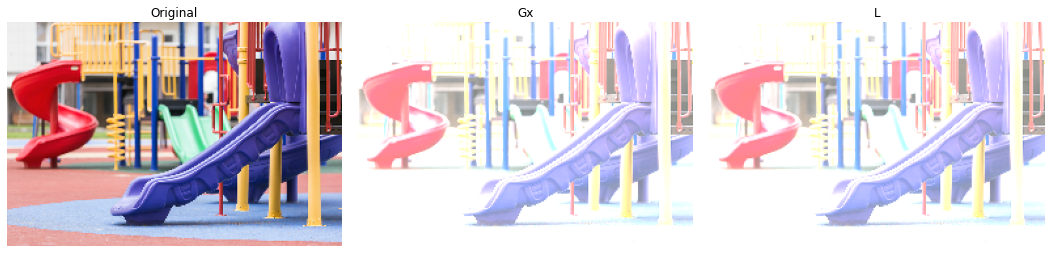

In [7]:
# Work: ラプラシアンフィルタのフィルターカーネルの値を設定
h_L = np.ones((1,1))

# フィルタの実行
ddepth = -1
L = cv2.filter2D(I, ddepth, h_L)

# 結果の表示
comp_results(I, Gx+0.5, L+0.5, "Gx", "L")

## 先鋭化フィルタ

先鋭化フィルタを設定してみましょう．

### 4近傍から先鋭化
$h_4 = \left[\begin{matrix}0 & -k & 0\\-k & 1+4k & -k\\0 & -k & 0\end{matrix}\right]$

### 8近傍から先鋭化
$h_8 = \left[\begin{matrix}-k & -k & -k\\-k & 1+8k & -k\\-k & -k & -k\end{matrix}\right]$

#### 計算の仕組み:
2次微分のラプラシアンのエッジの効果を元画像に足し込むような分解と考えられます．

$h_4 = \left[\begin{matrix}0 & -k & 0\\-k & 1+4k & -k\\0 & -k & 0\end{matrix}\right] = \left[\begin{matrix}0 & 0 & 0\\0 & 1 & 0\\0 & 0 & 0\end{matrix}\right]+ k \left[\begin{matrix}0 & -1 & 0\\-1 & 4 & -1\\0 & -1 & 0\end{matrix}\right] $<br>
$=元画像 + k * ラプラシアンフィルタ$

$k$がエッジの成分をどれだけ強調するかをコントロールしている形になります．

h4= [[1.]]
h8= [[1.]]


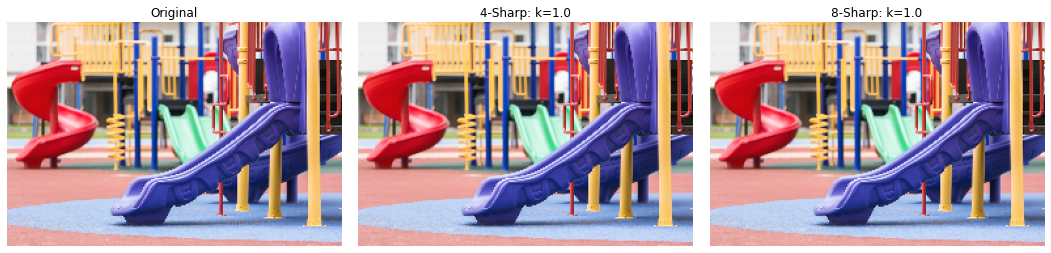

In [8]:
k = 1.0

# Work: 4近傍のカーネルの値を設定．
h4 = np.ones((1,1))

print("h4=", h4)

# Work: 8近傍のカーネルの値を設定．
h8 = np.ones((1,1))
print("h8=", h8)

# フィルタの実行
ddepth = -1
F1 = cv2.filter2D(I, ddepth, h4)
F2 = cv2.filter2D(I, ddepth, h8)

# 結果の表示
comp_results(I, F1, F2, f"4-Sharp: k={k}", f"8-Sharp: k={k}")